In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from facebook_scraper import get_posts, get_profile
import facebook

post_df_full = pd.read_excel("C:/FinalProject/DoraemonVietNam.xlsx")

c:\Users\FPT\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [94]:
!pip install facebook-sdk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
!pip install unidecode

  Obtaining dependency information for unidecode from https://files.pythonhosted.org/packages/e4/63/7685ef40c65aba621ccd2524a24181bf11f0535ab1fdba47e40738eacff6/Unidecode-1.3.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.5 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.5 kB ? eta -:--:--
   ------------------- -------------------- 112.6/235.5 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 225.3/235.5 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 235.5/235.5 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Sum comments

In [2]:
x = post_df_full["comments"].sum()
print("Tổng số comments là :",x)

Tổng số comments là : 34101


#### Filter comments

In [3]:
post_cmt = post_df_full["comments_full"].tolist()

In [4]:
arr = []
for i in range(len(post_cmt)):
    post_cmt[i] = post_cmt[i].replace("[","")
    post_cmt[i] = post_cmt[i].replace("]","")

    input_str = post_cmt[i]

    # Xóa dấu ngoặc đối với các thành phần và chia chuỗi thành một danh sách
    list_result = [item.strip('{}').split(',') for item in input_str.split('}, {')]

    arr.append(list_result)


### GET ID

In [5]:
list_id = []
for i in range(len(arr)) : 
    ss = ""
    for j in range(len(arr[i])) :
        if len(arr[i][j]) > 6:
            modified_str = arr[i][j][2].replace(":", "")
            ss = ss + modified_str + ", "
    list_id.append(ss)

In [6]:
for i in range(len(list_id)) :
    list_id[i] = list_id[i].replace("commenter_id","")
    list_id[i] = list_id[i].replace("'","")

In [7]:
#chuyển id thành danh sách để tiện thao tác
list_data = []
for i in range(len(list_id)) :
    string_data = list_id[i]
    cleaned_string = string_data.strip(', ')
    list_dt = cleaned_string.split(', ')
    for j in range(len(list_dt)) :
        list_data.append(list_dt[j])
    

In [8]:
list_data

['100006235961235',
 '  100000806580700',
 '  100007358446230',
 '  100038063723651',
 '  100005919630625',
 '  100002588330501',
 '  100003082453110',
 '  100013407970225',
 '  100068387500754',
 '  100081884676458',
 '  1024902400',
 '  100003163840208',
 '  100008758302678',
 '  100003178171602',
 '  100065041757770',
 '  100004321533248',
 '  100000289631492',
 '  100008326873134',
 '  100002923277268',
 '  100004080140931',
 '  100001529264188',
 '  100015119418034',
 '  100012419028793',
 '  100001218075374',
 '  100003129484453',
 '  100053595549882',
 '  100006709841230',
 '  100048638603818',
 '  100047874582494',
 '100064697348606',
 '  61551507684119',
 '  100006386712728',
 '  100006386712728',
 '  100078042531277',
 '100001290475687',
 '  100006882578408',
 '  100035136106327',
 '  100059082576144',
 '  100007593845974',
 '  100081806965938',
 '100009263674012',
 '  100003529555705',
 '  100011416840268',
 '  100008246163935',
 '  100004558036395',
 '  100018074558862',
 '

In [9]:
#số người đã comments
print(f"Trong tổng số {x} comments được comments từ {len(list_data)} người dùng Facebook")

Trong tổng số 34101 comments được comments từ 3032 người dùng Facebook


#### GET INFO

In [11]:
commenter = []
for i in range(len(list_data)):
    try:
        x = int(list_data[i])
        user = get_profile(str(x))
        commenter.append(user)
    except:
        continue


c:\Users\FPT\AppData\Local\Programs\Python\Python310\lib\site-packages\facebook_scraper\facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(


In [55]:
commenter

[{'Friend_count': None,
  'Follower_count': None,
  'Following_count': None,
  'cover_photo': 'https://scontent.fhan14-3.fna.fbcdn.net/v/t39.30808-6/397909431_6693415904028563_6465052904712400856_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=5f2048&_nc_ohc=wnkAg8t721oAX8B5ldX&_nc_ht=scontent.fhan14-3.fna&oh=00_AfDi2gvKtdCMhWrMLFFlAHmaa2itk7yeYHeCCGyJ8Ap5Aw&oe=655F5EA4',
  'profile_picture': 'https://scontent.fhan14-3.fna.fbcdn.net/v/t39.30808-1/386516634_6593269764043178_8109638575334085891_n.jpg?stp=c0.0.120.120a_cp0_dst-jpg_e15_p120x120_q65&_nc_cat=100&ccb=1-7&_nc_sid=5f2048&_nc_ohc=09QNsbanp8cAX_1uBtp&_nc_ht=scontent.fhan14-3.fna&oh=00_AfA64QMxTT-6HcnFg-begp3z2TBbO9Hrlfkt3Ba5Z-GHJg&oe=655E89E9',
  'id': '100000806580700',
  'Name': 'Võ Anh Hiền (ヴォ アインヒエン)',
  'Công việc': '株式会社ガイアフィールド\nArchitect\n1 tháng 9, 2018 - Hiện tại\nKawasaki-shi, Kanagawa, Japan',
  'Nơi từng sống': 'Nha Trang\nQuê quán',
  'Trích dẫn yêu thích': 'Hãy đặt ra mục tiêu chứ đừng ước mơ !!!'},
 

In [22]:
ds = list(commenter)

In [66]:
from unidecode import unidecode
import re

In [70]:
# Khởi tạo dictionary để lưu thông tin thành phố và số lượng người
ds_tp = {}

# Duyệt qua danh sách người bình luận
for i in range(len(ds)):
    try:
        x = ds[i]['Nơi từng sống'].split('\n')
        y = x[0].split(', ')

        # Xác định thành phố và tăng số lượng người sống ở thành phố đó
        if len(y) == 1:
            city = unidecode(y[0].lower())
        elif len(y) == 2:
            if y[1] == 'Vietnam':
                city = unidecode(y[0].lower())
            else:
                city = unidecode(y[1].lower())
        else:
            city = unidecode(y[-2].lower())

        # Xóa các ký tự đặc biệt
        city = re.sub(r'\W+', '', city)

        # Tăng số lượng người sống ở thành phố
        ds_tp[city] = ds_tp.get(city, 0) + 1

    except Exception as e:
        continue

In [72]:
len(ds_tp)

116

In [78]:
df_tp = pd.DataFrame(list(ds_tp.items()), columns=['Thành phố', 'Số lượng người'])
df_tp = df_tp.sort_values(by='Số lượng người', ascending=False)
df_tp

,Thành phố,Số lượng người
14,thanhphohochiminh,107
4,hanoi,85
9,danang,14
15,haiphong,13
39,hungyen,9
...,...,...
59,thuanthanh,1
1,calgary,1
56,caibe,1
55,hibac,1


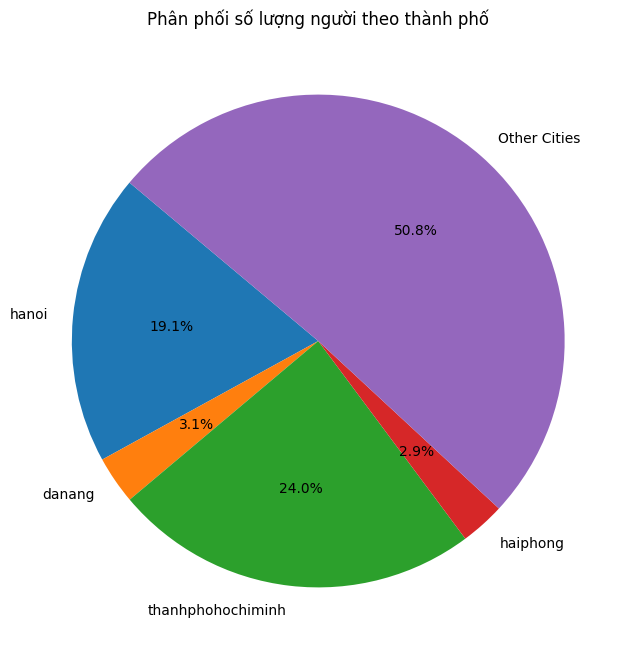

In [80]:
# Lọc các thành phố có trên 10 người
cities_over_10 = {city: count for city, count in ds_tp.items() if count > 10}

# Tính tổng số người trong các thành phố còn lại
count_other_cities = sum(count for count in ds_tp.values() if count <= 10)

# Tạo dictionary mới cho các thành phố còn lại
other_cities = {'Other Cities': count_other_cities}

# Kết hợp các dictionary thành một
combined_data = {**cities_over_10, **other_cities}

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(combined_data.values(), labels=combined_data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Phân phối số lượng người theo thành phố')
plt.show()

### GET TEXT

In [60]:
list_cmt = []
for i in range(len(arr)) : 
    ss = ""
    for j in range(len(arr[i])) :
        if len(arr[i][j]) > 6:
            modified_str = arr[i][j][6].replace(":", "")
            ss = ss + modified_str + "\n"
    list_cmt.append(ss)
    

In [61]:
for i in range(len(list_cmt)) :
    list_cmt[i] = list_cmt[i].replace("comment_text","")
    list_cmt[i] = list_cmt[i].replace("'","")
    

#### Comments have been cleaned up

In [62]:
list_cmt

['  Yến Xuân nghe nó ấy lắm\n  Nguyen Huong Lan\n  Thuỳ Linh bài học cuộc sống voiceover\n  Tường Vy\n  Mia Nguyen\n  Nho Goldie\n  Minh Phương\n  Kim AD Taylor\n  Nhan Mi Nhi\n  Duc Huy\n  Hung Phan\n  Grace Ngo\n  Tran Cam Ly\n  Lê Thân Bích Ngọc\n  Linh Thy\n  Nhõ Ri Nguyễn Phúc nghe nó cấn cấn\n  Ivy Nguyen\n  Thức Tên Thức\n  Nhàn Nhím 😅\n  Minh MoonierNeko 🤣🤣\n  Hồng Hoài\n  Ngo Ngoc Hung\n  Quỳnh Trang\n  Hieu Tran 🤣🤣\n  Hương Kiều\n  Elysia Ahgase =)))\n  Lan Phương\n  Nguyễn Khánh Huyền\n  Hồ Thị Hồng Vân\n',
 '  Không phải trò này đâu nha 🤣🤣🤣\n  Hóng\n  Board game trong đầu tui kiểu... 🥴\n  Nguyễn Trung Hiếu hóng mua về Tết chơi thay bài tiến lên bạn ưi )))\n  Trịnh Hoàng An chơi\n',
 '  Công nhận bánh này ăn ngon nha\n  Một hơi 3 cái bánh )))\n  Thử lòng ấy mà\n  Ăn lằm ăn lốn\n  Phương Nguyễn\n  Trương Hương Giang\n',
 '  Tất nhiên r\n  Gần 40 tuổi mà như lần đầu gặp nhau\n  Yêu suốt đời\n  HồnG BảO BìnH 💙\n  Hong yêu\n  Yêu rất nhiều 😍\n  Mãi yêu <3\n  Yêu ak\n  Thương lắm

#### Wordcloud of comments

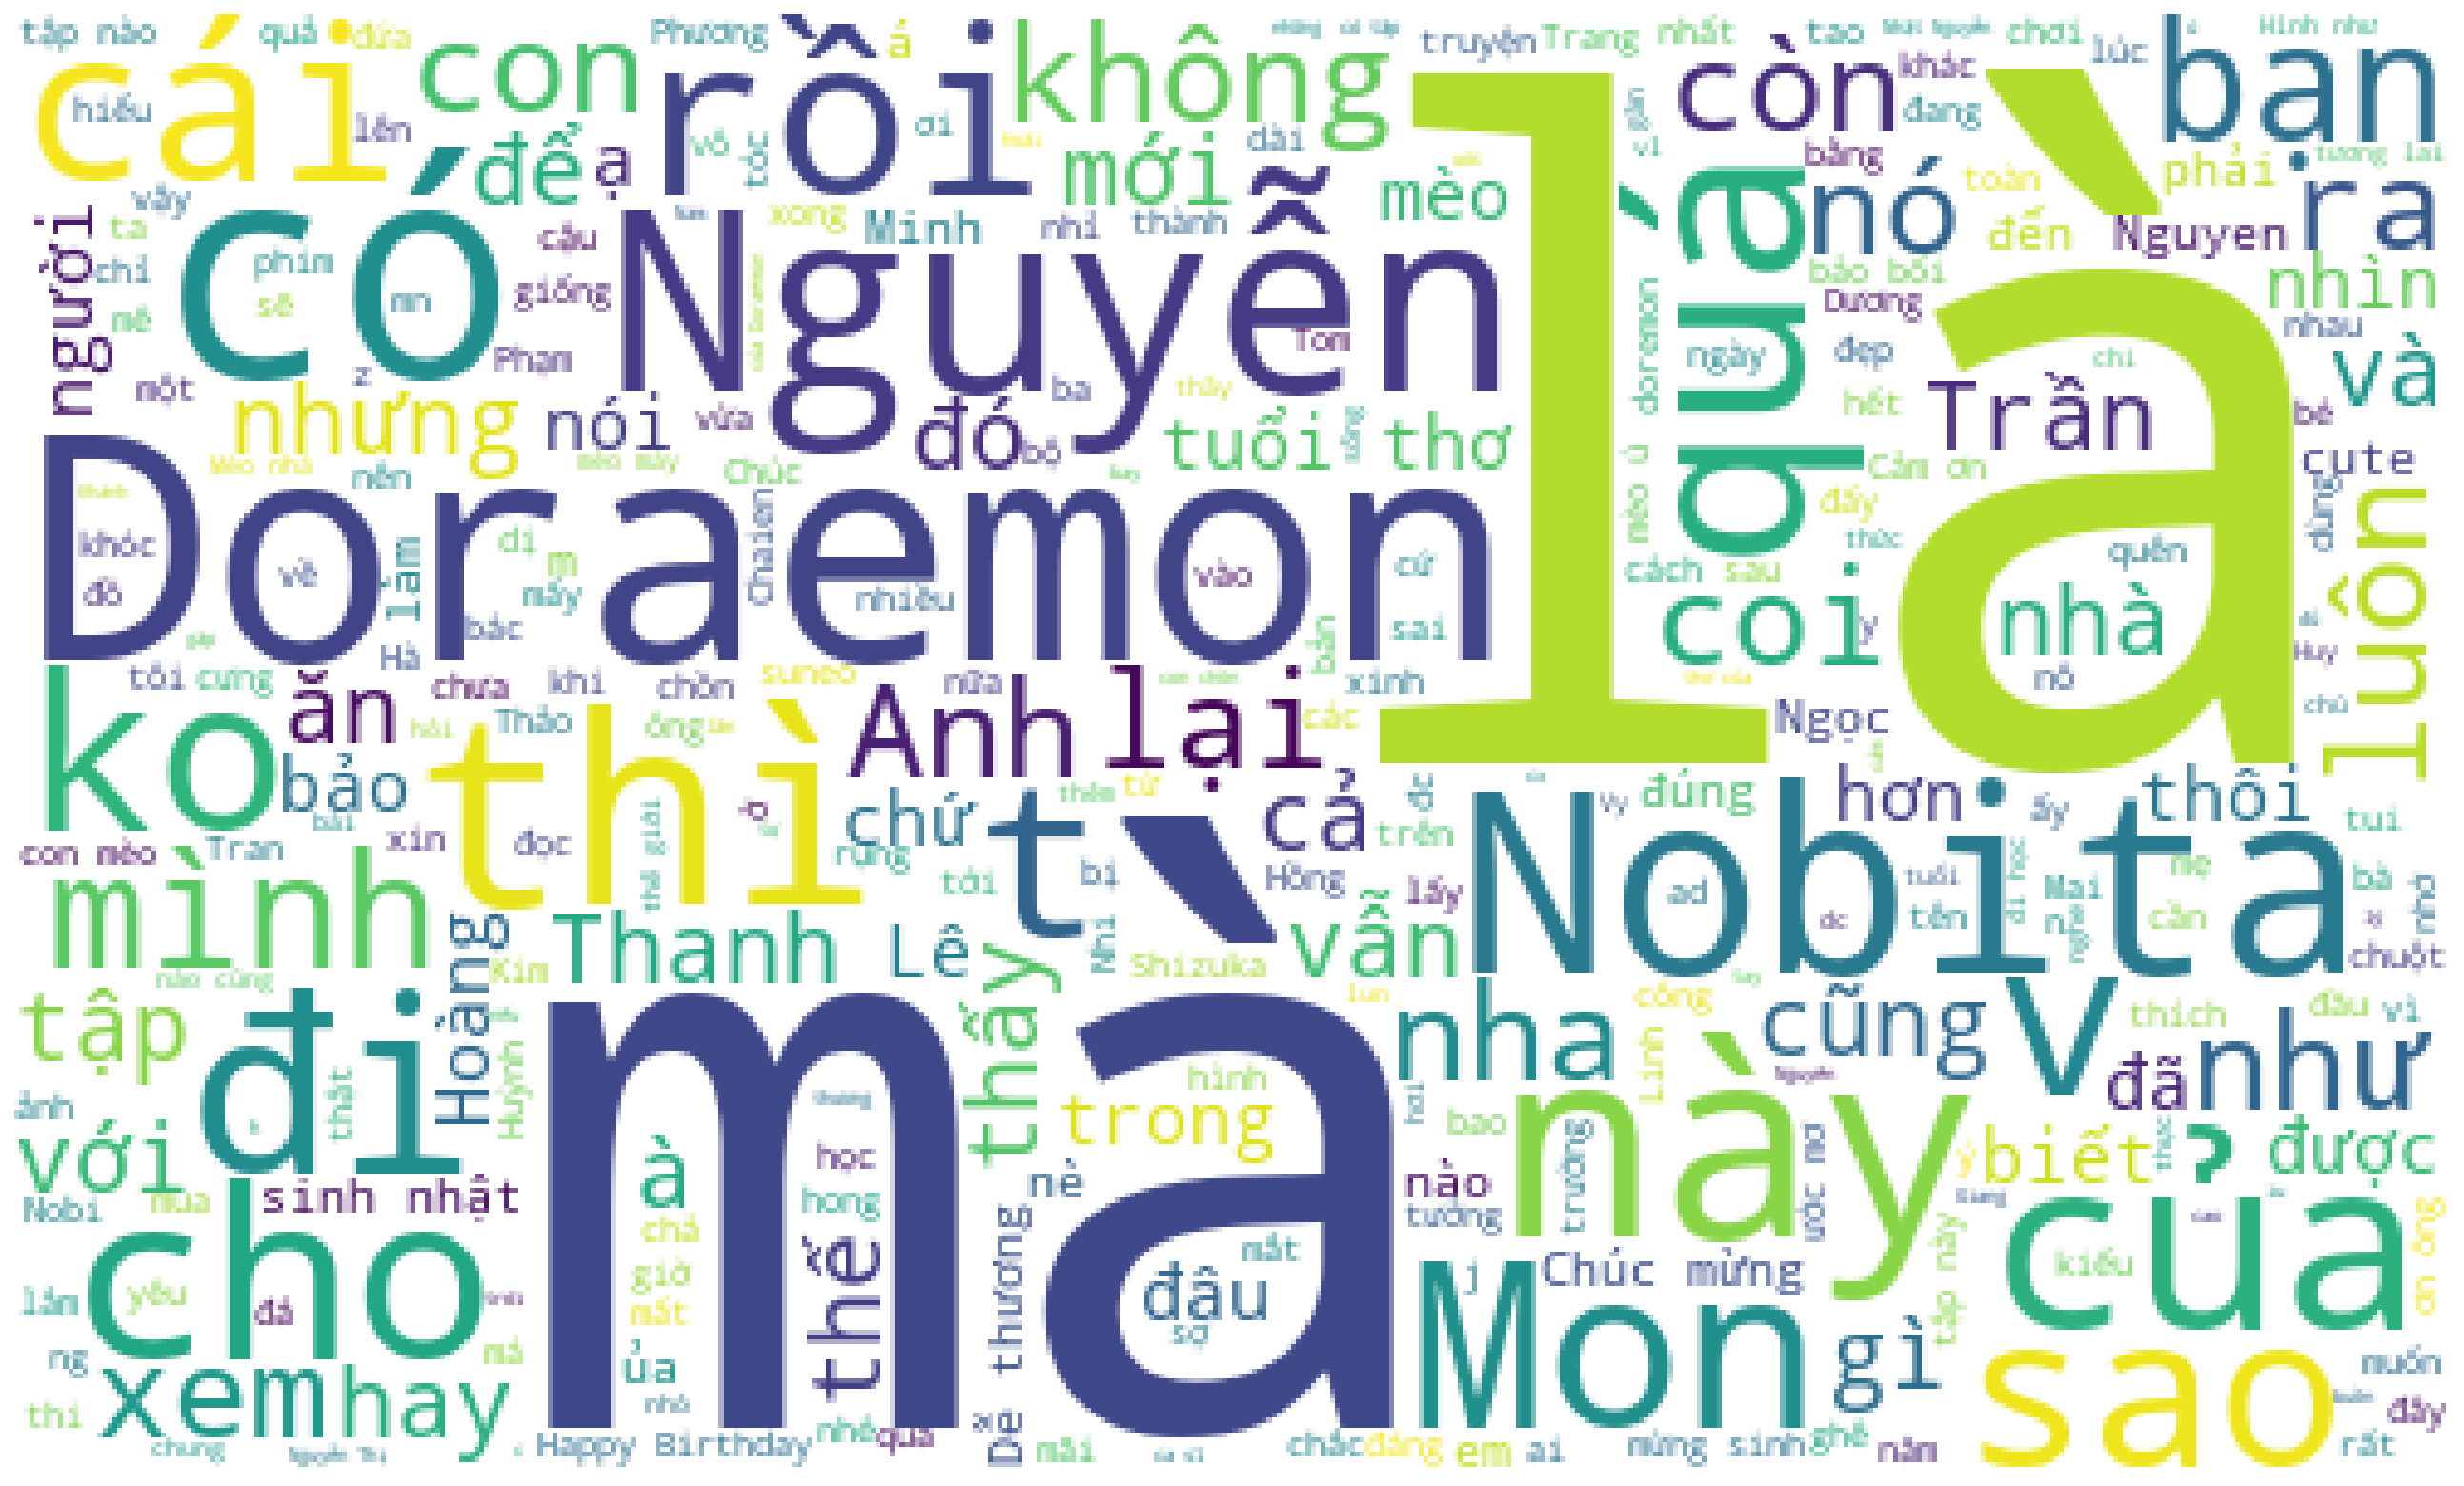

In [63]:
text = "\n".join(list_cmt)
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Comments emotions

In [64]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Tải dữ liệu cho việc phân tích cảm xúc
nltk.download('vader_lexicon')

# Khởi tạo đối tượng SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Phân tích cảm xúc
sentiment_scores = sid.polarity_scores(text)

# In kết quả
print(sentiment_scores)

# Xác định là tích cực, tiêu cực, hay trung tính dựa trên điểm số
if sentiment_scores['compound'] >= 0.05:
    print("Bình luận của các bài viết mang hướng tích cực")
elif sentiment_scores['compound'] <= -0.05:
    print("Bình luận của các bài viết mang hướng tiêu cực")
else:
    print("Bình luận của các bài viết mang hướng trung tính")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FPT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.006, 'neu': 0.968, 'pos': 0.026, 'compound': 0.9999}
Bình luận của các bài viết mang hướng tích cực
